In [40]:
%config IPCompleter.greedy=True


In [2]:
import pandas as pd

df_train = pd.read_csv('train_kaggle.csv')
df_train

,Id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


In [3]:
df_train['label'].describe()

count    30336.000000
mean         0.077664
std          0.267646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [4]:
import seaborn as sns

sns.distplot(df_train['label']);

In [5]:
import numpy as np

train0 = np.load('train/train/0.npy')
train0

array([[nan, nan,  1., ..., nan, nan, nan],
       [nan, nan,  2., ..., 19., nan, nan],
       [nan, nan,  3., ..., 22., nan, nan],
       ...,
       [nan, nan, 52., ..., 26., nan, nan],
       [nan, nan, 53., ..., 22., nan, nan],
       [nan, nan, 54., ..., 18., nan, nan]])

In [6]:
def load_dataframe(id):
    train_data = np.load("train/train/{}.npy".format(id))
    return pd.DataFrame(data=train_data)

In [7]:
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [48]:
def clear_missing_data(df, missing_indices):
    df = df.drop(missing_indices,1)
    # for col in df_temp.columns:
    #    df = df.drop(df.loc[df[col].isnull()].index)
    for col in df.columns:
        count = df[col].isnull().sum().max()
        df[col] = df[col].fillna(np.mean(df[col])) 
        df[col] = df[col].fillna(0) # if np mean is NA, then replace 0 
    return df

In [49]:
df8 = load_dataframe(8)
missing_df8 = get_missing_data(df8)
missing_indices = missing_df8[missing_df8['Percent'] > 0.9].index # .append(pd.Index([11,33,35]))
cleaned_df8 = clear_missing_data(df8, missing_indices)
missing_indices.sort_values(ascending=True)

Int64Index([0, 1, 4, 5, 7, 9, 10, 14, 16, 19, 20, 21, 23, 25, 27, 28, 30, 32,
            34, 36, 38],
           dtype='int64')

In [50]:
cleaned_df8

,2,3,6,8,11,12,13,15,17,18,22,24,26,29,31,33,35,37,39
0,1.0,120.014706,9.868519,3.744286,27.92,120.013889,0.489091,112.647059,81.67437,7.367021,47.382979,66.08,1.404255,97.930672,28.793939,1.0,-0.03,24.194328,37.618125
1,2.0,116.000000,9.868519,3.744286,27.92,120.013889,0.489091,117.000000,97.00000,7.367021,47.382979,81.00,1.404255,99.000000,28.793939,1.0,-0.03,20.000000,37.618125
2,3.0,120.014706,12.700000,4.000000,27.92,123.000000,0.489091,112.647059,81.67437,7.150000,66.000000,66.08,-7.000000,97.930672,37.600000,1.0,-0.03,24.194328,37.618125
3,4.0,120.014706,9.650000,3.600000,27.92,117.500000,0.489091,112.647059,81.67437,7.130000,80.500000,66.08,-4.000000,97.930672,31.000000,1.0,-0.03,24.194328,37.618125
4,5.0,120.014706,9.300000,3.600000,27.92,102.000000,0.489091,112.647059,81.67437,7.300000,52.000000,66.08,-1.000000,97.930672,28.000000,1.0,-0.03,24.194328,37.618125
5,6.0,120.014706,10.300000,3.800000,27.92,87.000000,0.489091,112.647059,81.67437,7.360000,42.000000,66.08,-1.000000,97.930672,31.000000,1.0,-0.03,24.194328,37.618125
6,7.0,118.000000,11.700000,3.600000,27.92,111.000000,1.000000,120.000000,84.00000,7.280000,54.000000,64.00,-1.000000,100.000000,32.700000,1.0,-0.03,30.000000,36.000000
7,8.0,106.000000,9.868519,3.744286,27.92,120.013889,0.489091,109.500000,74.00000,7.367021,47.382979,59.00,1.404255,98.500000,28.793939,1.0,-0.03,27.000000,37.618125
8,9.0,98.500000,9.868519,3.744286,27.92,97.000000,1.000000,102.500000,72.50000,7.340000,46.000000,58.50,-1.000000,97.000000,28.793939,1.0,-0.03,24.500000,35.670000
9,10.0,93.000000,9.868519,3.744286,27.92,120.013889,0.489091,98.000000,65.00000,7.367021,47.382979,51.00,1.404255,100.000000,28.793939,1.0,-0.03,30.000000,35.330000


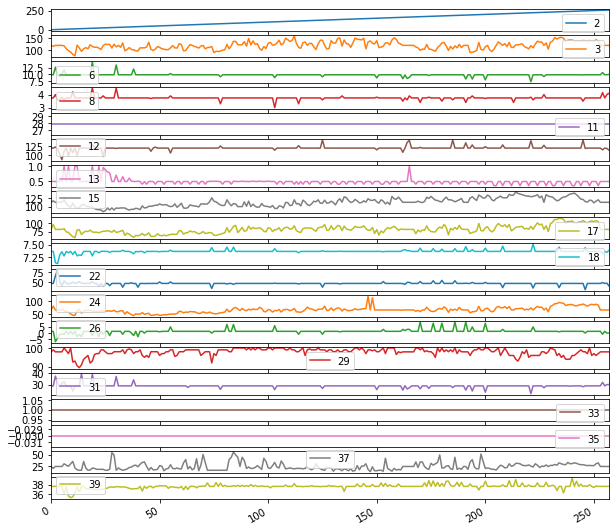

In [51]:
import matplotlib.pyplot as plt
cleaned_df8.plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [52]:
y = df_train['label']
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       1
11       0
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
30306    0
30307    0
30308    0
30309    0
30310    0
30311    0
30312    0
30313    0
30314    0
30315    0
30316    0
30317    0
30318    0
30319    0
30320    0
30321    1
30322    0
30323    0
30324    0
30325    0
30326    0
30327    0
30328    0
30329    0
30330    0
30331    0
30332    0
30333    1
30334    0
30335    1
Name: label, Length: 30336, dtype: int64

In [53]:
dataframes = []
for id in df_train['Id']:
    dfi = clear_missing_data(load_dataframe(id), missing_indices)
    if dfi.empty:
        print("{}:".format(id))
        continue
    dataframes.append(dfi.values)

In [56]:
df_train_all = np.array(dataframes)
np.save('df_train_all', df_train_all)

In [57]:
for df in dataframes:
    print(df.shape)

(54, 19)
(23, 19)
(48, 19)
(29, 19)
(48, 19)
(17, 19)
(45, 19)
(40, 19)
(258, 19)
(23, 19)
(34, 19)
(21, 19)
(39, 19)
(42, 19)
(15, 19)
(19, 19)
(37, 19)
(134, 19)
(48, 19)
(19, 19)
(57, 19)
(19, 19)
(21, 19)
(51, 19)
(50, 19)
(13, 19)
(10, 19)
(31, 19)
(48, 19)
(45, 19)
(55, 19)
(51, 19)
(37, 19)
(13, 19)
(41, 19)
(16, 19)
(18, 19)
(38, 19)
(45, 19)
(24, 19)
(34, 19)
(73, 19)
(45, 19)
(34, 19)
(19, 19)
(50, 19)
(18, 19)
(16, 19)
(18, 19)
(50, 19)
(40, 19)
(43, 19)
(25, 19)
(57, 19)
(14, 19)
(9, 19)
(35, 19)
(8, 19)
(37, 19)
(9, 19)
(18, 19)
(41, 19)
(14, 19)
(28, 19)
(29, 19)
(19, 19)
(18, 19)
(46, 19)
(12, 19)
(36, 19)
(54, 19)
(20, 19)
(23, 19)
(13, 19)
(38, 19)
(50, 19)
(23, 19)
(104, 19)
(42, 19)
(37, 19)
(36, 19)
(44, 19)
(50, 19)
(42, 19)
(55, 19)
(20, 19)
(46, 19)
(15, 19)
(26, 19)
(41, 19)
(54, 19)
(32, 19)
(29, 19)
(37, 19)
(35, 19)
(19, 19)
(34, 19)
(54, 19)
(22, 19)
(38, 19)
(36, 19)
(46, 19)
(19, 19)
(41, 19)
(37, 19)
(59, 19)
(40, 19)
(48, 19)
(48, 19)
(40, 19)
(49, 19)
(

(37, 19)
(12, 19)
(45, 19)
(24, 19)
(18, 19)
(57, 19)
(42, 19)
(53, 19)
(35, 19)
(21, 19)
(35, 19)
(23, 19)
(47, 19)
(19, 19)
(29, 19)
(70, 19)
(28, 19)
(14, 19)
(11, 19)
(45, 19)
(36, 19)
(51, 19)
(43, 19)
(26, 19)
(51, 19)
(36, 19)
(23, 19)
(49, 19)
(48, 19)
(20, 19)
(25, 19)
(45, 19)
(43, 19)
(8, 19)
(40, 19)
(43, 19)
(54, 19)
(55, 19)
(173, 19)
(37, 19)
(34, 19)
(40, 19)
(35, 19)
(52, 19)
(23, 19)
(44, 19)
(46, 19)
(18, 19)
(167, 19)
(37, 19)
(39, 19)
(15, 19)
(54, 19)
(49, 19)
(59, 19)
(57, 19)
(17, 19)
(48, 19)
(39, 19)
(49, 19)
(54, 19)
(41, 19)
(48, 19)
(44, 19)
(44, 19)
(54, 19)
(23, 19)
(28, 19)
(43, 19)
(44, 19)
(55, 19)
(36, 19)
(45, 19)
(19, 19)
(29, 19)
(21, 19)
(25, 19)
(41, 19)
(16, 19)
(23, 19)
(43, 19)
(41, 19)
(10, 19)
(19, 19)
(11, 19)
(28, 19)
(41, 19)
(58, 19)
(18, 19)
(11, 19)
(37, 19)
(18, 19)
(26, 19)
(58, 19)
(34, 19)
(86, 19)
(44, 19)
(14, 19)
(14, 19)
(44, 19)
(36, 19)
(43, 19)
(24, 19)
(57, 19)
(53, 19)
(24, 19)
(10, 19)
(48, 19)
(16, 19)
(22, 19)
(23, 19)


(29, 19)
(44, 19)
(15, 19)
(58, 19)
(24, 19)
(23, 19)
(28, 19)
(53, 19)
(49, 19)
(41, 19)
(43, 19)
(57, 19)
(23, 19)
(41, 19)
(19, 19)
(59, 19)
(48, 19)
(18, 19)
(41, 19)
(37, 19)
(44, 19)
(37, 19)
(56, 19)
(20, 19)
(26, 19)
(45, 19)
(45, 19)
(55, 19)
(56, 19)
(16, 19)
(111, 19)
(45, 19)
(21, 19)
(28, 19)
(48, 19)
(42, 19)
(27, 19)
(31, 19)
(27, 19)
(20, 19)
(48, 19)
(55, 19)
(54, 19)
(53, 19)
(58, 19)
(30, 19)
(30, 19)
(22, 19)
(26, 19)
(44, 19)
(37, 19)
(36, 19)
(42, 19)
(23, 19)
(142, 19)
(41, 19)
(46, 19)
(16, 19)
(56, 19)
(44, 19)
(44, 19)
(18, 19)
(18, 19)
(33, 19)
(48, 19)
(37, 19)
(46, 19)
(44, 19)
(92, 19)
(17, 19)
(46, 19)
(58, 19)
(45, 19)
(37, 19)
(42, 19)
(42, 19)
(31, 19)
(48, 19)
(65, 19)
(17, 19)
(15, 19)
(39, 19)
(46, 19)
(31, 19)
(8, 19)
(51, 19)
(16, 19)
(10, 19)
(39, 19)
(46, 19)
(41, 19)
(18, 19)
(38, 19)
(32, 19)
(48, 19)
(37, 19)
(36, 19)
(41, 19)
(30, 19)
(24, 19)
(43, 19)
(49, 19)
(36, 19)
(41, 19)
(45, 19)
(27, 19)
(19, 19)
(22, 19)
(72, 19)
(39, 19)
(22, 19)


(40, 19)
(39, 19)
(33, 19)
(19, 19)
(12, 19)
(50, 19)
(51, 19)
(51, 19)
(51, 19)
(54, 19)
(57, 19)
(9, 19)
(29, 19)
(53, 19)
(58, 19)
(16, 19)
(21, 19)
(57, 19)
(47, 19)
(19, 19)
(20, 19)
(54, 19)
(38, 19)
(46, 19)
(31, 19)
(57, 19)
(41, 19)
(46, 19)
(19, 19)
(44, 19)
(13, 19)
(36, 19)
(22, 19)
(41, 19)
(30, 19)
(46, 19)
(52, 19)
(37, 19)
(31, 19)
(53, 19)
(51, 19)
(58, 19)
(29, 19)
(44, 19)
(22, 19)
(10, 19)
(34, 19)
(24, 19)
(55, 19)
(27, 19)
(40, 19)
(26, 19)
(27, 19)
(56, 19)
(15, 19)
(46, 19)
(33, 19)
(22, 19)
(17, 19)
(48, 19)
(59, 19)
(53, 19)
(45, 19)
(22, 19)
(20, 19)
(38, 19)
(17, 19)
(25, 19)
(23, 19)
(35, 19)
(104, 19)
(14, 19)
(38, 19)
(47, 19)
(43, 19)
(34, 19)
(25, 19)
(56, 19)
(41, 19)
(42, 19)
(53, 19)
(52, 19)
(59, 19)
(38, 19)
(20, 19)
(31, 19)
(16, 19)
(43, 19)
(43, 19)
(31, 19)
(37, 19)
(40, 19)
(59, 19)
(28, 19)
(24, 19)
(29, 19)
(11, 19)
(46, 19)
(35, 19)
(27, 19)
(40, 19)
(52, 19)
(40, 19)
(18, 19)
(39, 19)
(47, 19)
(53, 19)
(48, 19)
(17, 19)
(53, 19)
(50, 19)
(

(41, 19)
(38, 19)
(57, 19)
(40, 19)
(28, 19)
(16, 19)
(32, 19)
(43, 19)
(50, 19)
(21, 19)
(41, 19)
(29, 19)
(90, 19)
(28, 19)
(22, 19)
(22, 19)
(40, 19)
(36, 19)
(47, 19)
(38, 19)
(46, 19)
(39, 19)
(48, 19)
(23, 19)
(35, 19)
(23, 19)
(42, 19)
(39, 19)
(50, 19)
(20, 19)
(31, 19)
(196, 19)
(28, 19)
(45, 19)
(16, 19)
(26, 19)
(9, 19)
(46, 19)
(53, 19)
(52, 19)
(38, 19)
(32, 19)
(14, 19)
(38, 19)
(46, 19)
(23, 19)
(49, 19)
(58, 19)
(18, 19)
(44, 19)
(45, 19)
(15, 19)
(50, 19)
(26, 19)
(35, 19)
(36, 19)
(49, 19)
(37, 19)
(44, 19)
(54, 19)
(21, 19)
(44, 19)
(13, 19)
(19, 19)
(53, 19)
(25, 19)
(39, 19)
(37, 19)
(32, 19)
(19, 19)
(37, 19)
(54, 19)
(45, 19)
(18, 19)
(42, 19)
(49, 19)
(45, 19)
(44, 19)
(46, 19)
(51, 19)
(42, 19)
(40, 19)
(46, 19)
(44, 19)
(20, 19)
(23, 19)
(41, 19)
(46, 19)
(50, 19)
(36, 19)
(40, 19)
(38, 19)
(39, 19)
(49, 19)
(22, 19)
(49, 19)
(42, 19)
(38, 19)
(20, 19)
(28, 19)
(37, 19)
(38, 19)
(28, 19)
(37, 19)
(24, 19)
(24, 19)
(19, 19)
(16, 19)
(50, 19)
(57, 19)
(19, 19)
(

(38, 19)
(23, 19)
(45, 19)
(27, 19)
(59, 19)
(48, 19)
(53, 19)
(13, 19)
(54, 19)
(42, 19)
(33, 19)
(30, 19)
(19, 19)
(41, 19)
(22, 19)
(47, 19)
(23, 19)
(41, 19)
(33, 19)
(47, 19)
(36, 19)
(37, 19)
(17, 19)
(44, 19)
(38, 19)
(55, 19)
(40, 19)
(21, 19)
(55, 19)
(38, 19)
(39, 19)
(111, 19)
(41, 19)
(40, 19)
(36, 19)
(18, 19)
(43, 19)
(39, 19)
(74, 19)
(24, 19)
(53, 19)
(18, 19)
(51, 19)
(29, 19)
(29, 19)
(44, 19)
(14, 19)
(39, 19)
(59, 19)
(9, 19)
(38, 19)
(52, 19)
(41, 19)
(54, 19)
(44, 19)
(37, 19)
(20, 19)
(27, 19)
(15, 19)
(41, 19)
(36, 19)
(45, 19)
(22, 19)
(50, 19)
(16, 19)
(42, 19)
(23, 19)
(57, 19)
(41, 19)
(45, 19)
(36, 19)
(18, 19)
(48, 19)
(23, 19)
(23, 19)
(30, 19)
(56, 19)
(54, 19)
(23, 19)
(49, 19)
(24, 19)
(43, 19)
(16, 19)
(24, 19)
(39, 19)
(57, 19)
(55, 19)
(55, 19)
(48, 19)
(56, 19)
(27, 19)
(49, 19)
(24, 19)
(40, 19)
(25, 19)
(42, 19)
(44, 19)
(36, 19)
(41, 19)
(9, 19)
(35, 19)
(23, 19)
(27, 19)
(44, 19)
(41, 19)
(53, 19)
(56, 19)
(38, 19)
(37, 19)
(23, 19)
(49, 19)
(2

(25, 19)
(56, 19)
(39, 19)
(35, 19)
(47, 19)
(50, 19)
(39, 19)
(21, 19)
(94, 19)
(26, 19)
(19, 19)
(28, 19)
(48, 19)
(51, 19)
(48, 19)
(27, 19)
(36, 19)
(74, 19)
(16, 19)
(48, 19)
(8, 19)
(26, 19)
(22, 19)
(45, 19)
(22, 19)
(41, 19)
(49, 19)
(68, 19)
(46, 19)
(18, 19)
(49, 19)
(35, 19)
(39, 19)
(46, 19)
(21, 19)
(44, 19)
(52, 19)
(49, 19)
(38, 19)
(37, 19)
(57, 19)
(13, 19)
(44, 19)
(19, 19)
(42, 19)
(19, 19)
(46, 19)
(46, 19)
(24, 19)
(45, 19)
(41, 19)
(37, 19)
(53, 19)
(44, 19)
(55, 19)
(30, 19)
(23, 19)
(42, 19)
(18, 19)
(27, 19)
(39, 19)
(44, 19)
(23, 19)
(18, 19)
(35, 19)
(21, 19)
(22, 19)
(20, 19)
(23, 19)
(25, 19)
(41, 19)
(43, 19)
(48, 19)
(36, 19)
(38, 19)
(38, 19)
(27, 19)
(39, 19)
(56, 19)
(22, 19)
(30, 19)
(47, 19)
(17, 19)
(40, 19)
(38, 19)
(48, 19)
(49, 19)
(26, 19)
(96, 19)
(52, 19)
(50, 19)
(14, 19)
(44, 19)
(9, 19)
(44, 19)
(37, 19)
(33, 19)
(40, 19)
(57, 19)
(43, 19)
(56, 19)
(22, 19)
(40, 19)
(37, 19)
(36, 19)
(14, 19)
(20, 19)
(53, 19)
(38, 19)
(39, 19)
(58, 19)
(38

(37, 19)
(22, 19)
(44, 19)
(41, 19)
(16, 19)
(40, 19)
(48, 19)
(44, 19)
(33, 19)
(21, 19)
(42, 19)
(22, 19)
(35, 19)
(19, 19)
(21, 19)
(41, 19)
(48, 19)
(43, 19)
(38, 19)
(40, 19)
(57, 19)
(48, 19)
(50, 19)
(33, 19)
(19, 19)
(46, 19)
(18, 19)
(29, 19)
(46, 19)
(38, 19)
(15, 19)
(8, 19)
(40, 19)
(40, 19)
(23, 19)
(40, 19)
(31, 19)
(45, 19)
(26, 19)
(65, 19)
(49, 19)
(19, 19)
(25, 19)
(38, 19)
(51, 19)
(20, 19)
(40, 19)
(24, 19)
(27, 19)
(44, 19)
(36, 19)
(37, 19)
(51, 19)
(40, 19)
(25, 19)
(37, 19)
(38, 19)
(59, 19)
(51, 19)
(48, 19)
(36, 19)
(43, 19)
(39, 19)
(19, 19)
(44, 19)
(42, 19)
(49, 19)
(16, 19)
(52, 19)
(50, 19)
(55, 19)
(30, 19)
(18, 19)
(35, 19)
(40, 19)
(29, 19)
(45, 19)
(18, 19)
(20, 19)
(38, 19)
(32, 19)
(26, 19)
(21, 19)
(26, 19)
(39, 19)
(54, 19)
(26, 19)
(33, 19)
(46, 19)
(29, 19)
(39, 19)
(28, 19)
(47, 19)
(45, 19)
(34, 19)
(15, 19)
(47, 19)
(41, 19)
(44, 19)
(49, 19)
(34, 19)
(44, 19)
(17, 19)
(37, 19)
(59, 19)
(9, 19)
(50, 19)
(54, 19)
(17, 19)
(38, 19)
(35, 19)
(21

(26, 19)
(48, 19)
(42, 19)
(17, 19)
(17, 19)
(49, 19)
(58, 19)
(40, 19)
(28, 19)
(63, 19)
(39, 19)
(42, 19)
(53, 19)
(39, 19)
(47, 19)
(16, 19)
(46, 19)
(56, 19)
(45, 19)
(20, 19)
(44, 19)
(48, 19)
(14, 19)
(20, 19)
(59, 19)
(33, 19)
(23, 19)
(42, 19)
(36, 19)
(46, 19)
(40, 19)
(49, 19)
(40, 19)
(36, 19)
(47, 19)
(44, 19)
(17, 19)
(41, 19)
(46, 19)
(53, 19)
(55, 19)
(26, 19)
(38, 19)
(25, 19)
(35, 19)
(22, 19)
(37, 19)
(18, 19)
(37, 19)
(53, 19)
(32, 19)
(16, 19)
(44, 19)
(48, 19)
(36, 19)
(41, 19)
(41, 19)
(40, 19)
(22, 19)
(50, 19)
(38, 19)
(36, 19)
(44, 19)
(36, 19)
(57, 19)
(39, 19)
(45, 19)
(36, 19)
(19, 19)
(27, 19)
(25, 19)
(56, 19)
(53, 19)
(47, 19)
(36, 19)
(22, 19)
(46, 19)
(38, 19)
(22, 19)
(52, 19)
(32, 19)
(57, 19)
(29, 19)
(53, 19)
(52, 19)
(36, 19)
(23, 19)
(27, 19)
(23, 19)
(55, 19)
(31, 19)
(12, 19)
(36, 19)
(23, 19)
(22, 19)
(25, 19)
(53, 19)
(14, 19)
(54, 19)
(157, 19)
(39, 19)
(53, 19)
(28, 19)
(43, 19)
(28, 19)
(18, 19)
(38, 19)
(58, 19)
(20, 19)
(16, 19)
(107, 19)

(36, 19)
(49, 19)
(18, 19)
(41, 19)
(52, 19)
(34, 19)
(51, 19)
(48, 19)
(246, 19)
(37, 19)
(26, 19)
(31, 19)
(21, 19)
(53, 19)
(29, 19)
(25, 19)
(8, 19)
(56, 19)
(73, 19)
(36, 19)
(40, 19)
(55, 19)
(45, 19)
(25, 19)
(23, 19)
(44, 19)
(39, 19)
(29, 19)
(36, 19)
(52, 19)
(34, 19)
(36, 19)
(21, 19)
(26, 19)
(44, 19)
(55, 19)
(50, 19)
(34, 19)
(40, 19)
(48, 19)
(37, 19)
(57, 19)
(45, 19)
(53, 19)
(50, 19)
(37, 19)
(50, 19)
(47, 19)
(56, 19)
(40, 19)
(17, 19)
(23, 19)
(31, 19)
(36, 19)
(17, 19)
(48, 19)
(49, 19)
(41, 19)
(12, 19)
(36, 19)
(41, 19)
(44, 19)
(30, 19)
(37, 19)
(38, 19)
(26, 19)
(35, 19)
(57, 19)
(16, 19)
(16, 19)
(36, 19)
(37, 19)
(56, 19)
(42, 19)
(29, 19)
(52, 19)
(56, 19)
(183, 19)
(41, 19)
(46, 19)
(41, 19)
(76, 19)
(31, 19)
(47, 19)
(25, 19)
(50, 19)
(19, 19)
(29, 19)
(28, 19)
(22, 19)
(58, 19)
(39, 19)
(18, 19)
(28, 19)
(36, 19)
(33, 19)
(38, 19)
(51, 19)
(110, 19)
(46, 19)
(47, 19)
(44, 19)
(48, 19)
(16, 19)
(24, 19)
(35, 19)
(54, 19)
(19, 19)
(27, 19)
(43, 19)
(17, 19)

(47, 19)
(29, 19)
(57, 19)
(41, 19)
(56, 19)
(26, 19)
(35, 19)
(20, 19)
(37, 19)
(10, 19)
(46, 19)
(44, 19)
(40, 19)
(19, 19)
(26, 19)
(35, 19)
(47, 19)
(8, 19)
(36, 19)
(33, 19)
(21, 19)
(48, 19)
(45, 19)
(59, 19)
(18, 19)
(42, 19)
(19, 19)
(42, 19)
(57, 19)
(48, 19)
(58, 19)
(44, 19)
(50, 19)
(16, 19)
(46, 19)
(21, 19)
(43, 19)
(58, 19)
(23, 19)
(46, 19)
(48, 19)
(43, 19)
(11, 19)
(19, 19)
(48, 19)
(14, 19)
(16, 19)
(50, 19)
(13, 19)
(37, 19)
(27, 19)
(43, 19)
(38, 19)
(33, 19)
(44, 19)
(48, 19)
(46, 19)
(23, 19)
(54, 19)
(42, 19)
(37, 19)
(9, 19)
(42, 19)
(54, 19)
(29, 19)
(36, 19)
(42, 19)
(54, 19)
(42, 19)
(27, 19)
(39, 19)
(54, 19)
(21, 19)
(45, 19)
(43, 19)
(43, 19)
(50, 19)
(46, 19)
(18, 19)
(43, 19)
(49, 19)
(17, 19)
(31, 19)
(58, 19)
(51, 19)
(44, 19)
(38, 19)
(52, 19)
(30, 19)
(44, 19)
(41, 19)
(42, 19)
(43, 19)
(15, 19)
(38, 19)
(25, 19)
(25, 19)
(24, 19)
(19, 19)
(44, 19)
(38, 19)
(21, 19)
(22, 19)
(36, 19)
(39, 19)
(40, 19)
(36, 19)
(48, 19)
(11, 19)
(32, 19)
(160, 19)
(4

(31, 19)
(36, 19)
(46, 19)
(44, 19)
(55, 19)
(42, 19)
(35, 19)
(22, 19)
(36, 19)
(55, 19)
(44, 19)
(19, 19)
(27, 19)
(21, 19)
(21, 19)
(11, 19)
(35, 19)
(20, 19)
(43, 19)
(19, 19)
(47, 19)
(37, 19)
(52, 19)
(19, 19)
(39, 19)
(41, 19)
(18, 19)
(45, 19)
(12, 19)
(19, 19)
(38, 19)
(18, 19)
(36, 19)
(37, 19)
(33, 19)
(46, 19)
(36, 19)
(14, 19)
(28, 19)
(30, 19)
(25, 19)
(8, 19)
(21, 19)
(49, 19)
(26, 19)
(39, 19)
(41, 19)
(26, 19)
(54, 19)
(18, 19)
(18, 19)
(42, 19)
(44, 19)
(36, 19)
(48, 19)
(48, 19)
(39, 19)
(45, 19)
(55, 19)
(43, 19)
(25, 19)
(43, 19)
(57, 19)
(199, 19)
(20, 19)
(26, 19)
(56, 19)
(21, 19)
(52, 19)
(37, 19)
(27, 19)
(11, 19)
(36, 19)
(28, 19)
(45, 19)
(49, 19)
(43, 19)
(56, 19)
(57, 19)
(51, 19)
(46, 19)
(47, 19)
(30, 19)
(35, 19)
(21, 19)
(35, 19)
(40, 19)
(40, 19)
(14, 19)
(21, 19)
(41, 19)
(29, 19)
(45, 19)
(13, 19)
(34, 19)
(13, 19)
(54, 19)
(146, 19)
(36, 19)
(53, 19)
(39, 19)
(40, 19)
(45, 19)
(68, 19)
(45, 19)
(56, 19)
(27, 19)
(37, 19)
(46, 19)
(41, 19)
(54, 19)


(44, 19)
(37, 19)
(42, 19)
(12, 19)
(43, 19)
(25, 19)
(21, 19)
(37, 19)
(43, 19)
(53, 19)
(58, 19)
(22, 19)
(27, 19)
(34, 19)
(16, 19)
(16, 19)
(47, 19)
(45, 19)
(33, 19)
(26, 19)
(157, 19)
(49, 19)
(23, 19)
(271, 19)
(25, 19)
(48, 19)
(53, 19)
(53, 19)
(47, 19)
(40, 19)
(18, 19)
(47, 19)
(37, 19)
(53, 19)
(22, 19)
(23, 19)
(12, 19)
(136, 19)
(49, 19)
(37, 19)
(55, 19)
(48, 19)
(53, 19)
(42, 19)
(16, 19)
(37, 19)
(24, 19)
(52, 19)
(39, 19)
(36, 19)
(58, 19)
(26, 19)
(54, 19)
(25, 19)
(38, 19)
(27, 19)
(54, 19)
(39, 19)
(23, 19)
(53, 19)
(27, 19)
(27, 19)
(17, 19)
(33, 19)
(46, 19)
(20, 19)
(41, 19)
(36, 19)
(40, 19)
(49, 19)
(20, 19)
(35, 19)
(54, 19)
(36, 19)
(17, 19)
(34, 19)
(37, 19)
(29, 19)
(51, 19)
(44, 19)
(16, 19)
(50, 19)
(13, 19)
(22, 19)
(27, 19)
(41, 19)
(41, 19)
(17, 19)
(52, 19)
(44, 19)
(44, 19)
(54, 19)
(22, 19)
(39, 19)
(28, 19)
(22, 19)
(43, 19)
(45, 19)
(19, 19)
(52, 19)
(40, 19)
(12, 19)
(28, 19)
(44, 19)
(13, 19)
(42, 19)
(15, 19)
(58, 19)
(55, 19)
(22, 19)
(38, 19

(20, 19)
(16, 19)
(22, 19)
(45, 19)
(22, 19)
(36, 19)
(49, 19)
(34, 19)
(28, 19)
(45, 19)
(41, 19)
(34, 19)
(55, 19)
(8, 19)
(40, 19)
(16, 19)
(40, 19)
(48, 19)
(55, 19)
(220, 19)
(37, 19)
(103, 19)
(19, 19)
(42, 19)
(41, 19)
(50, 19)
(33, 19)
(49, 19)
(51, 19)
(82, 19)
(42, 19)
(39, 19)
(38, 19)
(46, 19)
(42, 19)
(11, 19)
(19, 19)
(34, 19)
(51, 19)
(58, 19)
(13, 19)
(24, 19)
(58, 19)
(17, 19)
(10, 19)
(51, 19)
(47, 19)
(18, 19)
(9, 19)
(56, 19)
(14, 19)
(56, 19)
(18, 19)
(23, 19)
(26, 19)
(36, 19)
(51, 19)
(40, 19)
(17, 19)
(26, 19)
(52, 19)
(18, 19)
(15, 19)
(59, 19)
(17, 19)
(33, 19)
(9, 19)
(22, 19)
(49, 19)
(55, 19)
(46, 19)
(49, 19)
(36, 19)
(40, 19)
(56, 19)
(23, 19)
(59, 19)
(24, 19)
(42, 19)
(18, 19)
(43, 19)
(56, 19)
(21, 19)
(42, 19)
(55, 19)
(16, 19)
(94, 19)
(30, 19)
(48, 19)
(15, 19)
(25, 19)
(19, 19)
(44, 19)
(22, 19)
(22, 19)
(21, 19)
(37, 19)
(47, 19)
(37, 19)
(46, 19)
(20, 19)
(40, 19)
(32, 19)
(34, 19)
(52, 19)
(27, 19)
(21, 19)
(26, 19)
(35, 19)
(43, 19)
(30, 19)
(2

(18, 19)
(27, 19)
(41, 19)
(58, 19)
(44, 19)
(38, 19)
(22, 19)
(53, 19)
(51, 19)
(44, 19)
(24, 19)
(34, 19)
(44, 19)
(38, 19)
(56, 19)
(32, 19)
(52, 19)
(20, 19)
(36, 19)
(30, 19)
(42, 19)
(24, 19)
(39, 19)
(16, 19)
(36, 19)
(27, 19)
(39, 19)
(35, 19)
(16, 19)
(50, 19)
(14, 19)
(19, 19)
(14, 19)
(38, 19)
(26, 19)
(43, 19)
(20, 19)
(41, 19)
(24, 19)
(9, 19)
(335, 19)
(49, 19)
(28, 19)
(32, 19)
(11, 19)
(41, 19)
(52, 19)
(22, 19)
(36, 19)
(42, 19)
(37, 19)
(42, 19)
(29, 19)
(57, 19)
(32, 19)
(42, 19)
(10, 19)
(54, 19)
(54, 19)
(54, 19)
(50, 19)
(45, 19)
(46, 19)
(16, 19)
(44, 19)
(54, 19)
(59, 19)
(52, 19)
(36, 19)
(18, 19)
(51, 19)
(38, 19)
(54, 19)
(26, 19)
(42, 19)
(18, 19)
(19, 19)
(19, 19)
(46, 19)
(38, 19)
(8, 19)
(45, 19)
(48, 19)
(47, 19)
(32, 19)
(43, 19)
(43, 19)
(20, 19)
(22, 19)
(45, 19)
(19, 19)
(42, 19)
(44, 19)
(19, 19)
(25, 19)
(12, 19)
(41, 19)
(55, 19)
(138, 19)
(57, 19)
(52, 19)
(15, 19)
(27, 19)
(21, 19)
(45, 19)
(20, 19)
(16, 19)
(15, 19)
(39, 19)
(17, 19)
(19, 19)
(

(20, 19)
(38, 19)
(47, 19)
(49, 19)
(45, 19)
(138, 19)
(58, 19)
(32, 19)
(44, 19)
(18, 19)
(38, 19)
(28, 19)
(15, 19)
(48, 19)
(11, 19)
(35, 19)
(44, 19)
(24, 19)
(26, 19)
(43, 19)
(25, 19)
(37, 19)
(18, 19)
(48, 19)
(29, 19)
(48, 19)
(39, 19)
(52, 19)
(40, 19)
(56, 19)
(9, 19)
(45, 19)
(55, 19)
(40, 19)
(37, 19)
(41, 19)
(51, 19)
(28, 19)
(41, 19)
(102, 19)
(29, 19)
(21, 19)
(47, 19)
(38, 19)
(36, 19)
(40, 19)
(31, 19)
(38, 19)
(82, 19)
(15, 19)
(12, 19)
(46, 19)
(47, 19)
(18, 19)
(36, 19)
(45, 19)
(39, 19)
(39, 19)
(41, 19)
(40, 19)
(45, 19)
(54, 19)
(19, 19)
(49, 19)
(48, 19)
(51, 19)
(18, 19)
(22, 19)
(57, 19)
(43, 19)
(327, 19)
(55, 19)
(37, 19)
(27, 19)
(22, 19)
(52, 19)
(17, 19)
(58, 19)
(23, 19)
(55, 19)
(23, 19)
(44, 19)
(24, 19)
(16, 19)
(45, 19)
(36, 19)
(51, 19)
(16, 19)
(49, 19)
(38, 19)
(55, 19)
(29, 19)
(44, 19)
(26, 19)
(335, 19)
(37, 19)
(54, 19)
(37, 19)
(13, 19)
(37, 19)
(44, 19)
(48, 19)
(51, 19)
(39, 19)
(21, 19)
(48, 19)
(36, 19)
(38, 19)
(42, 19)
(49, 19)
(30, 19

(113, 19)
(19, 19)
(40, 19)
(17, 19)
(38, 19)
(17, 19)
(49, 19)
(37, 19)
(21, 19)
(38, 19)
(52, 19)
(33, 19)
(20, 19)
(41, 19)
(37, 19)
(22, 19)
(54, 19)
(18, 19)
(38, 19)
(38, 19)
(36, 19)
(24, 19)
(55, 19)
(45, 19)
(23, 19)
(24, 19)
(8, 19)
(55, 19)
(195, 19)
(32, 19)
(38, 19)
(40, 19)
(22, 19)
(46, 19)
(18, 19)
(21, 19)
(50, 19)
(39, 19)
(19, 19)
(34, 19)
(46, 19)
(24, 19)
(42, 19)
(22, 19)
(20, 19)
(44, 19)
(47, 19)
(96, 19)
(39, 19)
(45, 19)
(23, 19)
(52, 19)
(47, 19)
(24, 19)
(36, 19)
(45, 19)
(15, 19)
(51, 19)
(32, 19)
(22, 19)
(9, 19)
(35, 19)
(49, 19)
(47, 19)
(14, 19)
(28, 19)
(12, 19)
(18, 19)
(36, 19)
(20, 19)
(40, 19)
(20, 19)
(23, 19)
(50, 19)
(36, 19)
(18, 19)
(43, 19)
(22, 19)
(56, 19)
(17, 19)
(42, 19)
(39, 19)
(54, 19)
(45, 19)
(47, 19)
(24, 19)
(21, 19)
(16, 19)
(13, 19)
(18, 19)
(45, 19)
(36, 19)
(50, 19)
(40, 19)
(42, 19)
(49, 19)
(51, 19)
(26, 19)
(23, 19)
(48, 19)
(32, 19)
(52, 19)
(48, 19)
(12, 19)
(46, 19)
(42, 19)
(59, 19)
(46, 19)
(40, 19)
(23, 19)
(44, 19)
(

(21, 19)
(27, 19)
(23, 19)
(41, 19)
(39, 19)
(24, 19)
(20, 19)
(51, 19)
(21, 19)
(40, 19)
(49, 19)
(21, 19)
(39, 19)
(46, 19)
(55, 19)
(8, 19)
(41, 19)
(56, 19)
(50, 19)
(20, 19)
(22, 19)
(38, 19)
(30, 19)
(41, 19)
(24, 19)
(53, 19)
(26, 19)
(43, 19)
(49, 19)
(14, 19)
(47, 19)
(50, 19)
(37, 19)
(48, 19)
(46, 19)
(38, 19)
(34, 19)
(264, 19)
(53, 19)
(28, 19)
(24, 19)
(24, 19)
(41, 19)
(53, 19)
(49, 19)
(57, 19)
(13, 19)
(39, 19)
(312, 19)
(32, 19)
(94, 19)
(36, 19)
(22, 19)
(39, 19)
(31, 19)
(15, 19)
(47, 19)
(44, 19)
(47, 19)
(27, 19)
(59, 19)
(55, 19)
(34, 19)
(25, 19)
(16, 19)
(43, 19)
(19, 19)
(58, 19)
(33, 19)
(42, 19)
(41, 19)
(37, 19)
(22, 19)
(55, 19)
(57, 19)
(26, 19)
(25, 19)
(19, 19)
(15, 19)
(39, 19)
(17, 19)
(10, 19)
(21, 19)
(47, 19)
(30, 19)
(8, 19)
(20, 19)
(25, 19)
(43, 19)
(44, 19)
(49, 19)
(21, 19)
(40, 19)
(19, 19)
(41, 19)
(39, 19)
(58, 19)
(46, 19)
(13, 19)
(20, 19)
(59, 19)
(41, 19)
(44, 19)
(17, 19)
(45, 19)
(51, 19)
(22, 19)
(20, 19)
(43, 19)
(45, 19)
(40, 19)
(

(41, 19)
(40, 19)
(36, 19)
(53, 19)
(22, 19)
(35, 19)
(21, 19)
(55, 19)
(45, 19)
(37, 19)
(8, 19)
(44, 19)
(62, 19)
(42, 19)
(26, 19)
(45, 19)
(12, 19)
(40, 19)
(58, 19)
(50, 19)
(52, 19)
(44, 19)
(57, 19)
(26, 19)
(50, 19)
(21, 19)
(37, 19)
(37, 19)
(55, 19)
(51, 19)
(18, 19)
(53, 19)
(44, 19)
(45, 19)
(17, 19)
(47, 19)
(53, 19)
(41, 19)
(48, 19)
(24, 19)
(21, 19)
(22, 19)
(25, 19)
(36, 19)
(55, 19)
(23, 19)
(21, 19)
(22, 19)
(27, 19)
(25, 19)
(23, 19)
(59, 19)
(45, 19)
(22, 19)
(19, 19)
(44, 19)
(21, 19)
(38, 19)
(46, 19)
(15, 19)
(12, 19)
(43, 19)
(26, 19)
(51, 19)
(35, 19)
(41, 19)
(38, 19)
(55, 19)
(41, 19)
(14, 19)
(14, 19)
(36, 19)
(29, 19)
(42, 19)
(25, 19)
(42, 19)
(25, 19)
(45, 19)
(36, 19)
(27, 19)
(24, 19)
(21, 19)
(36, 19)
(39, 19)
(37, 19)
(47, 19)
(18, 19)
(44, 19)
(36, 19)
(17, 19)
(18, 19)
(28, 19)
(114, 19)
(28, 19)
(41, 19)
(45, 19)
(24, 19)
(53, 19)
(31, 19)
(16, 19)
(21, 19)
(21, 19)
(48, 19)
(23, 19)
(32, 19)
(26, 19)
(55, 19)
(19, 19)
(57, 19)
(11, 19)
(36, 19)
(

(41, 19)
(12, 19)
(21, 19)
(31, 19)
(32, 19)
(50, 19)
(39, 19)
(14, 19)
(51, 19)
(34, 19)
(38, 19)
(14, 19)
(33, 19)
(49, 19)
(23, 19)
(47, 19)
(14, 19)
(38, 19)
(39, 19)
(38, 19)
(48, 19)
(59, 19)
(9, 19)
(45, 19)
(41, 19)
(39, 19)
(37, 19)
(57, 19)
(45, 19)
(28, 19)
(24, 19)
(162, 19)
(43, 19)
(24, 19)
(52, 19)
(22, 19)
(46, 19)
(54, 19)
(43, 19)
(54, 19)
(53, 19)
(93, 19)
(252, 19)
(21, 19)
(38, 19)
(38, 19)
(15, 19)
(14, 19)
(40, 19)
(21, 19)
(21, 19)
(42, 19)
(25, 19)
(47, 19)
(130, 19)
(36, 19)
(28, 19)
(56, 19)
(39, 19)
(24, 19)
(22, 19)
(49, 19)
(42, 19)
(40, 19)
(38, 19)
(31, 19)
(65, 19)
(31, 19)
(41, 19)
(23, 19)
(37, 19)
(25, 19)
(51, 19)
(23, 19)
(30, 19)
(43, 19)
(16, 19)
(57, 19)
(12, 19)
(50, 19)
(25, 19)
(39, 19)
(32, 19)
(55, 19)
(54, 19)
(20, 19)
(43, 19)
(40, 19)
(39, 19)
(20, 19)
(42, 19)
(27, 19)
(42, 19)
(25, 19)
(16, 19)
(51, 19)
(47, 19)
(39, 19)
(45, 19)
(40, 19)
(21, 19)
(51, 19)
(52, 19)
(49, 19)
(18, 19)
(55, 19)
(43, 19)
(49, 19)
(37, 19)
(38, 19)
(50, 19)

In [64]:
def pad_data(dfs):
    data = []
    for i in range(len(dfs)):
        df = dfs[i]
        diff = 400 - df.shape[0]
        if diff > 0:
            halfDiff = int(diff / 2)
            df = np.pad(df, [(halfDiff, halfDiff + diff % 2), (0,0)], 'constant')
        else:
            print(diff)
        data.append(df)
    data = np.stack(data)
    return data

In [65]:
XTrain = pad_data(dataframes)

In [66]:
def load_dataframe_test(id):
    train_data = np.load("test/test/{}.npy".format(id))
    return pd.DataFrame(data=train_data)

df_test = pd.read_csv('sample_solution.csv')
dataframestest = []
for id in df_test['Id']:
    dfi = clear_missing_data(load_dataframe_test(id), missing_indices)
    if dfi.empty:
        print("{}:".format(id))
        continue
    dataframestest.append(dfi.values)

df_test_all = np.array(dataframestest)
df_test_all

array([array([[  1.        , 120.19230769,  11.43333333, ...,  -0.89      ,
         21.04      ,  36.85263158],
       [  2.        , 151.        ,  11.43333333, ...,  -0.89      ,
         25.        ,  36.7       ],
       [  3.        , 131.        ,  11.43333333, ...,  -0.89      ,
         21.04      ,  36.85263158],
       ...,
       [ 52.        , 124.        ,  11.43333333, ...,  -0.89      ,
         22.        ,  36.8       ],
       [ 53.        , 126.        ,  11.43333333, ...,  -0.89      ,
         24.        ,  36.8       ],
       [ 54.        , 136.        ,  11.43333333, ...,  -0.89      ,
         22.5       ,  36.8       ]]),
       array([[ 1.00000000e+00,  1.71405405e+02,  1.03000000e+01,
         2.95000000e+00,  4.70000000e+01,  1.55200000e+02,
         0.00000000e+00,  8.10270270e+01,  1.09270270e+02,
         0.00000000e+00,  0.00000000e+00,  7.82702703e+01,
         0.00000000e+00,  9.85945946e+01,  3.31000000e+01,
         0.00000000e+00, -1.30000000e-01,

In [67]:
np.save('df_test_all', df_test_all)

In [68]:
XTest = pad_data(dataframestest)

In [69]:
print(XTest.shape)

(10000, 400, 19)


In [72]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(400, 19)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [73]:
model.fit(XTrain, y, epochs=5)

Epoch 1/5
30336/30336 [==============================] - 8s 249us/sample - loss: 1.2637 - acc: 0.9381
Epoch 2/5
30336/30336 [==============================] - 6s 193us/sample - loss: 0.1962 - acc: 0.9405
Epoch 3/5
30336/30336 [==============================] - 6s 192us/sample - loss: 0.2025 - acc: 0.9442
Epoch 4/5
30336/30336 [==============================] - 6s 194us/sample - loss: 0.2043 - acc: 0.9342
Epoch 5/5
30336/30336 [==============================] - 6s 191us/sample - loss: 0.2022 - acc: 0.9274


In [74]:
YTest = model.predict(XTest)


In [75]:
df_test['Predicted'] = YTest
df_test

,Id,Predicted
0,0,0.662815
1,1,0.996947
2,2,0.942438
3,3,0.785031
4,4,0.986659
5,5,0.986484
6,6,0.995726
7,7,0.945681
8,8,0.991760
9,9,0.988750


In [76]:
df_test.to_csv('test.csv', index=False)

In [ ]:
np.save(.XTrain.values)